In [15]:
from skimage.io import imread, imshow
from skimage import img_as_ubyte, img_as_float
from scipy import signal
import numpy as np

In [16]:
img = imread('lab_img.png')

In [17]:
# Все, что нужно для фильтра Гаусса
import math
def g_func(sigma: float, x: float, y: float)-> float: #Финкция 
    return ((math.pi * 2 * sigma ** 2)**-1) * math.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))

def fill(sigma: float)->float: #Строим ядро по заданной sigma
    array = []
    k = round(sigma * 3)
    for x in range(- k, k + 1):
        for y in range(- k, k + 1):
            array.append(g_func(sigma, float(x), float(y)))
    array = np.array(array)
    array = array.reshape(k * 2 + 1, k * 2 + 1)
    array /= array.sum()
    return array


In [18]:
def build_gaussian(img, sigma=0.66, n_layers=5): #описываем функцию построения Гаусианы
    box = fill(sigma)
    img_conv = img.copy()
    gaussian = []
    for _ in range(n_layers):
        new = img_conv.copy()
        if len(new.shape) > 2:
            for i in range(3):
                    new[:, :, i] = np.clip(signal.convolve2d(img_conv[:, :, i], box, "same"), 0, 255)
        else:
            new = np.clip(signal.convolve2d(img_conv, box, "same").astype('uint8'), 0, 255)
        gaussian.append(new)
        img_conv=new.copy()
    return gaussian

In [19]:
res = build_gaussian(img)

In [20]:
import matplotlib.pyplot as plt 
def plot_figures(figures, nrows = 1, ncols=1):
    """Строим изображение из нужного числа изображений подряд.
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,15))
    for ind,title in zip(range(len(figures)), figures):
        axeslist.ravel()[ind].imshow(figures[title], cmap=plt.jet())
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout()


In [21]:
res_dic = {i:resourse for i, resourse in enumerate(res)}

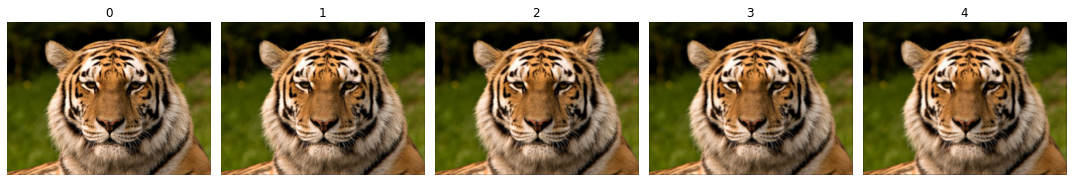

In [22]:
plot_figures(res_dic, 1, 5)
plt.show()


In [23]:
res1 = build_gaussian(img, sigma=0.5)

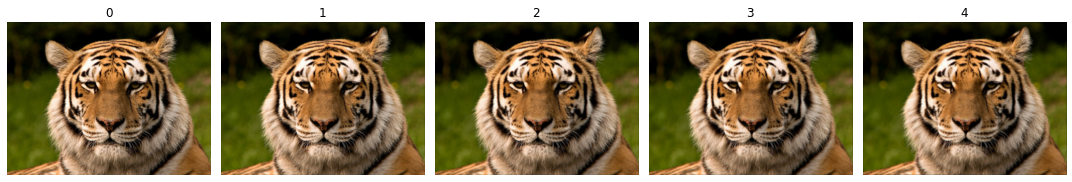

In [24]:
res1_dic = {i:resourse for i, resourse in enumerate(res1)}
plot_figures(res1_dic, 1, 5)
plt.show()

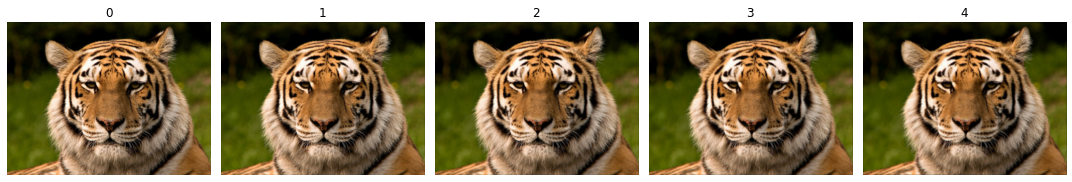

In [25]:
res2 = build_gaussian(img, sigma=1)
res2_dic = {i:resourse for i, resourse in enumerate(res1)}
plot_figures(res2_dic, 1, 5)
plt.show()

In [26]:
def laplassian(img, sigma=0.66, n_layers=5): #строим лапласовскую пирамиду
    images = build_gaussian(img, sigma, n_layers)
    results = []
    results.append(img - images[0])
    for i in range(1, len(images)):
        results.append(images[i] - images[i-1])
    results.append(images[len(images) - 1])
    return results
        

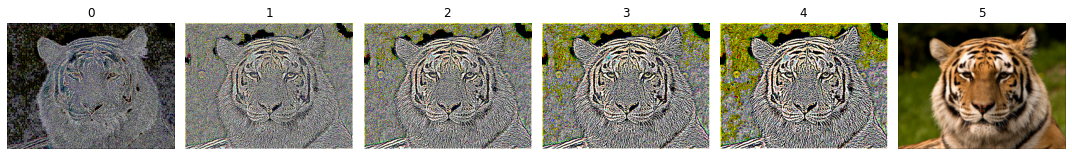

In [27]:
l = laplassian(img)
l_r = {i:resourse for i, resourse in enumerate(l)}
plot_figures(l_r, 1, len(l_r))
plt.show()

In [70]:
def final(img1, img2, mask, sigma=2, n_layers=5):#окончательная функция слклейки
    la = laplassian(img1, sigma, n_layers)
    lb = laplassian(img2, sigma, n_layers)
    gm = build_gaussian(mask, sigma, n_layers + 1)
    la = np.array(la)
    lb = np.array(lb)
    gm = np.array(gm)
    result = gm * la + ((1 - gm) * lb)
    result = np.clip(result.astype('uint8'), 0, 255)
    #result = result.astype('uint8')
    return result


In [71]:
a = imread('a.png')
b = imread('b.png')
mask = imread('mask.png')
mask = (mask > 128).astype('float')
#Будем эксперементировать с различными параметрами sigma и n_layers чтобы показать зависимость качества склейки от них

In [72]:
ls = final(a, b, mask, sigma = 0.45, n_layers=5)

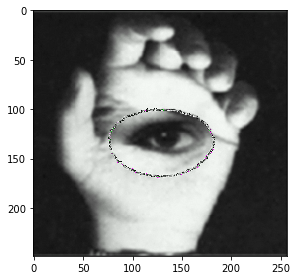

In [73]:
r = 0
for i in ls:
    r += i
imshow(r)

In [74]:
ls = final(a, b, mask, sigma = 0.25, n_layers=5)
l_s = {i:resourse for i, resourse in enumerate(ls)}


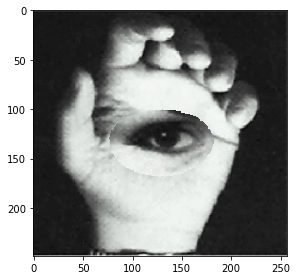

In [75]:
r = 0
for i in ls:
    r += i
imshow(r)

In [76]:
ls = final(a, b, mask, sigma = 1, n_layers=5)
l_s = {i:resourse for i, resourse in enumerate(ls)}

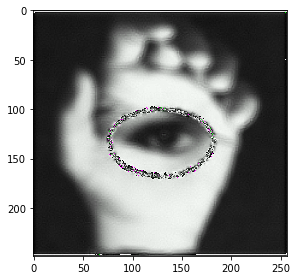

In [77]:
r = 0
for i in ls:
    r += i
imshow(r)

In [78]:
ls = final(a, b, mask, sigma = 0.35, n_layers=15)
l_s = {i:resourse for i, resourse in enumerate(ls)}

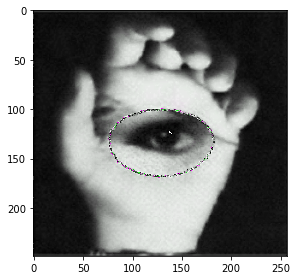

In [79]:
r = 0
for i in ls:
    r += i
imshow(r)

In [80]:
ls = final(a, b, mask, sigma = 0.35, n_layers=25)
l_s = {i:resourse for i, resourse in enumerate(ls)}

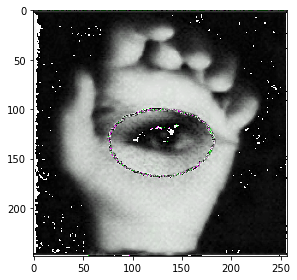

In [81]:
r = 0
for i in ls:
    r += i
imshow(r)

In [82]:
ls = final(a, b, mask, sigma = 0.35, n_layers=3)
l_s = {i:resourse for i, resourse in enumerate(ls)}

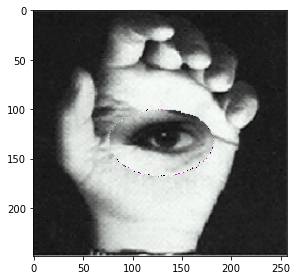

In [83]:
r = 0
for i in ls:
    r += i
imshow(r)

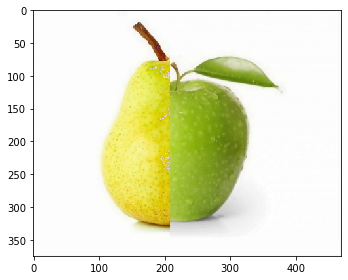

In [88]:
a = imread('a1.png') #Возьмем свои изображения и проведем работу с ними
b = imread('b1.png')
mask = imread('mask1.png')
mask = (mask > 128).astype('float')
ls = final(a, b, mask, sigma = 0.25, n_layers=5)
l_s = {i:resourse for i, resourse in enumerate(ls)}
r = 0
for i in ls:
    r += i
imshow(r)

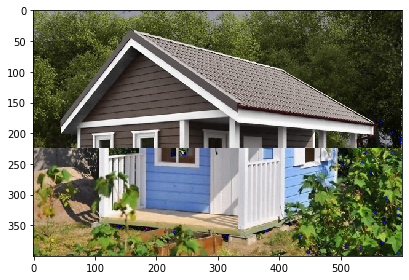

In [95]:
a = imread('1.jpg')
b = imread('2.jpg')
mask = imread('mask2.jpg')
mask = (mask > 128).astype('float')
ls = final(a, b, mask, sigma = 0.25, n_layers=5)
l_s = {i:resourse for i, resourse in enumerate(ls)}
r = 0
for i in ls:
    r += i
imshow(r)

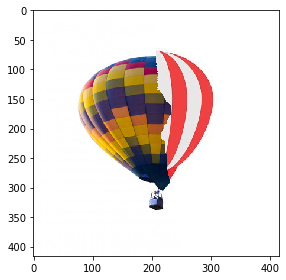

In [104]:
a = imread('3.jpg')
b = imread('4.jpg')
mask = imread('mask3.jpg')#тут специально взята зигзагообразная маск
mask = (mask > 128).astype('float')
ls = final(a, b, mask, sigma = 0.15, n_layers=5)
l_s = {i:resourse for i, resourse in enumerate(ls)}
r = 0
for i in ls:
    r += i
imshow(r)